## Загрузка данных

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import torch
import torch.nn as nn

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
def plotting(column,name,name_2,column_name): #Функция для построения графиков
    fig,ax = plt.subplots(figsize=(8,4))
    sns.histplot(data=df[column],color='orange')
    ax.set_title(name)
    ax.set_xlabel(column_name,fontsize=11)
    ax.set_ylabel('Количество звезд',fontsize=11)
    plt.show()
    fig,ax = plt.subplots(figsize=(8,4))
    sns.boxplot(data=df[column],color='orange')
    ax.set_title(name_2)
    ax.set_ylabel(column_name,fontsize=11)

In [3]:
df = pd.read_csv('/datasets/6_class.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              240 non-null    int64  
 1   Temperature (K)         240 non-null    int64  
 2   Luminosity(L/Lo)        240 non-null    float64
 3   Radius(R/Ro)            240 non-null    float64
 4   Absolute magnitude(Mv)  240 non-null    float64
 5   Star type               240 non-null    int64  
 6   Star color              240 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,119.50000,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,69.42622,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,0.00000,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,59.75000,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,119.50000,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,179.25000,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,239.00000,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [6]:
df

,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,1939,0.000138,0.1030,20.06,0,Red
...,...,...,...,...,...,...,...
235,235,38940,374830.000000,1356.0000,-9.93,5,Blue
236,236,30839,834042.000000,1194.0000,-10.63,5,Blue
237,237,8829,537493.000000,1423.0000,-10.73,5,White
238,238,9235,404940.000000,1112.0000,-11.23,5,White


## Предобработка и анализ данных

In [7]:
df = df.drop('Unnamed: 0',axis=1) #Удаляем столбец с нумерацией 

In [8]:
df = df.rename(columns={'Temperature (K)':'temp','Luminosity(L/Lo)':'luminos',
                        'Radius(R/Ro)':'radius','Absolute magnitude(Mv)':'magnitude',
                       'Star type':'type','Star color':'color'})

In [9]:
df['type'].unique()

array([0, 1, 2, 3, 4, 5])

In [10]:
df['color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

В столбце с цветом звезды были обнаружены проблемы в цветах

In [11]:
df['color'] = df['color'].str.lower() #Приведение всех названий к нижнему регистру
df['color'] = df['color'].str.replace(' ','-') #Замена всех пробелов на - для приведения к общему типу цвет_1-цвет_2
df['color'] = df['color'].replace(['blue-white-','blue-'],['blue-white','blue'])

In [12]:
df['color'].unique()

array(['red', 'blue-white', 'white', 'yellowish-white',
       'pale-yellow-orange', 'blue', 'whitish', 'yellow-white', 'orange',
       'white-yellow', 'yellowish', 'orange-red'], dtype=object)

Проблемы значений в столбце с цветом исправлены!

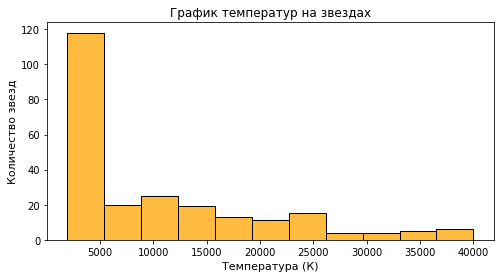

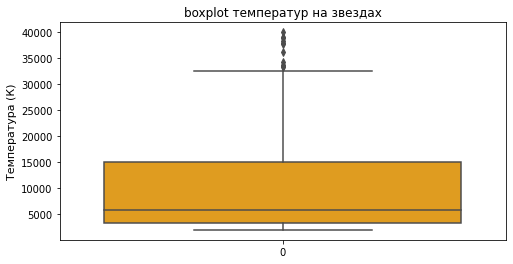

In [13]:
plotting('temp','График температур на звездах','boxplot температур на звездах','Температура (К)')

Исходя из графиков мы можем видеть, что температура большинства звезд находится до 5500К при этом аномальными значениями исходя из графика boxplot мы можем посчитать все зввезды чья температура выше 34000К. Мы можем оставить лишь не аномальные данные во всех характеристиках и по итогу посмотреть сколько процентов данных мы потерям.

In [14]:
df_2 = df.query('temp<34000')

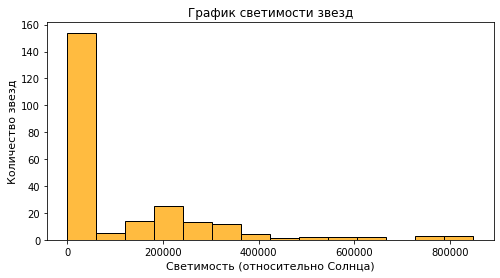

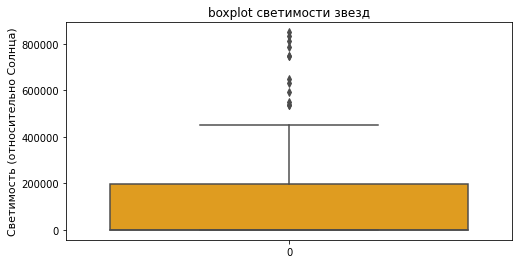

In [15]:
plotting('luminos','График светимости звезд','boxplot светимости звезд','Светимость (относительно Солнца)')

Большинство звезд в наших данных сходны по светимости с Солнцем, при этои аномальными значениями можно считать светимость больше 500000 светимостей Солнца.

In [16]:
df_2 = df_2.query('luminos<500000')

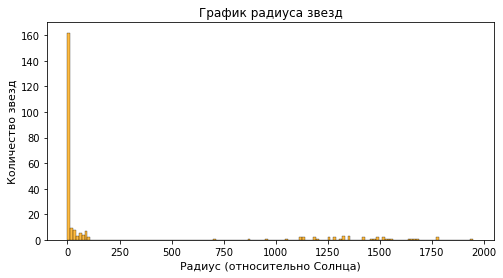

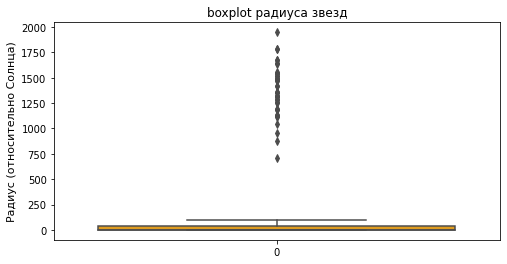

In [17]:
plotting('radius','График радиуса звезд','boxplot радиуса звезд','Радиус (относительно Солнца)')

Исходя из графиков мы можем сделать вывод, что большинство звезд в наших данных сходны по радиусу с Солнцем, при этом аномальными данными можно считать звезды больше чем 250 радиусов Солнца

In [18]:
df_2 = df_2.query('radius<250')

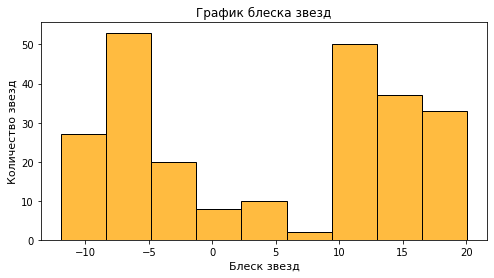

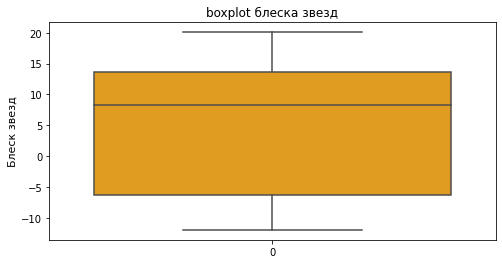

In [19]:
plotting('magnitude','График блеска звезд','boxplot блеска звезд','Блеск звезд')

Исходя из графиков мы можем увидеть, что данные о блеске здвезд распространены более равномерно, чем остальные величины, а аномальные значения исходя из boxplot отсутствуют вовсе

In [20]:
df_2.count()

temp         191
luminos      191
radius       191
magnitude    191
type         191
color        191
dtype: int64

In [21]:
100-191/240*100

20.41666666666667

После удаления всех аномальных значений мы потеряли 20,4% данных, что слишком много, а значит мы вынуждены будем оставить наши данные вместе с аномальными значениями.

### Подготовка данных для построения нейросети

In [22]:
target = df['temp']
features = df.drop('temp',axis=1)

In [23]:
#Разделение выборки на тестовую и обучающую
train_features, test_features, train_target, test_target = train_test_split(
    features, 
    target, 
    test_size=0.3, 
    shuffle=True,
    random_state=44)

In [24]:
onehot_encoder = OneHotEncoder(sparse=False, drop='first') #Перевод категориальных значений к числовым по средством метода One-Hot Encoding с удалением первого столбца для избегания дамми ловушки

categories = ['type','color'] 
numerics = ['luminos','radius','magnitude']

onehot_encoder.fit(train_features[categories])

train_features_result = onehot_encoder.transform(train_features[categories])
train_features_result = pd.DataFrame(train_features_result, columns=onehot_encoder.get_feature_names(categories),\
                                                                        index=train_features.index)
train_features = train_features_result.join(train_features[numerics])



test_features_result = onehot_encoder.transform(test_features[categories])
test_features_result = pd.DataFrame(test_features_result, columns=onehot_encoder.get_feature_names(categories),\
                                                                        index=test_features.index)
test_features = test_features_result.join(test_features[numerics])



In [25]:
other_train = train_features.drop(['luminos','radius','magnitude'],axis=1)
other_test = test_features.drop(['luminos','radius','magnitude'],axis=1)

scaler = StandardScaler() #Масштабирование всех признаков
scaler.fit(train_features[numerics])

train_features_scaled = scaler.transform(train_features[numerics])
train_features_scaled = pd.DataFrame(train_features_scaled, columns=numerics,\
                                                                        index=train_features.index)
train_features = train_features_scaled.join(other_train)


test_features_scaled = scaler.transform(test_features[numerics])
test_features_scaled = pd.DataFrame(test_features_scaled, columns=numerics,\
                                                                        index=test_features.index)
test_features = test_features_scaled.join(other_test)

In [26]:
train_features

,luminos,radius,magnitude,type_1,type_2,type_3,type_4,type_5,color_blue-white,color_orange,color_orange-red,color_pale-yellow-orange,color_red,color_white,color_white-yellow,color_whitish,color_yellow-white,color_yellowish,color_yellowish-white
108,0.209341,-0.377501,-1.020824,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,-0.579004,-0.483225,0.616117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
159,0.547441,-0.471274,-0.859436,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,-0.579004,-0.483998,1.137748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
85,-0.579004,-0.484084,0.921602,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.579004,-0.483393,0.571927,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.503582,2.407265,-1.512675,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
173,1.175341,2.656005,-1.295569,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,0.781169,-0.302692,-1.058289,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
test_features

,luminos,radius,magnitude,type_1,type_2,type_3,type_4,type_5,color_blue-white,color_orange,color_orange-red,color_pale-yellow-orange,color_red,color_white,color_white-yellow,color_whitish,color_yellow-white,color_yellowish,color_yellowish-white
223,2.404660,-0.332616,-0.995367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,-0.023832,1.926617,-1.449272,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
152,-0.572942,-0.473360,-0.617353,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.579004,-0.483925,1.250143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
69,-0.579004,-0.483880,1.445154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,-0.579004,-0.483581,0.870688,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73,-0.579004,-0.483450,0.725630,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
79,-0.579004,-0.483803,0.921602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
135,-0.579004,-0.482739,0.995572,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Построение базовой нейронной сети

In [28]:
train_features = torch.tensor(train_features.values)
test_features = torch.tensor(test_features.values)
train_target = torch.FloatTensor(train_target.values)
test_target = torch.FloatTensor(test_target.values)

In [29]:
best_rmse = 999999999

n_in_neurons = 19
n_hidden_neurons_1 = 15
n_hidden_neurons_2 = 6
n_out_neurons = 1

net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_2, n_out_neurons)
)


optimizer = torch.optim.Adam(net.parameters(),lr=0.026)

loss = nn.MSELoss()

num_epochs = 1000

for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    preds = net.forward(train_features.float()).flatten()    
    
    loss_value = loss(preds,train_target) 
    
    loss_value.backward()
    
    optimizer.step()
    if epoch % 100== 0 or epoch==num_epochs :
        net.eval()
        test_preds = net.forward(test_features.float()).flatten()
        test_preds_2 = test_preds.detach().numpy()
        rmse =  mean_squared_error(test_target,test_preds_2,squared=False)
        print(rmse)
        
        if rmse<best_rmse:
            best_preds = test_preds_2
            best_rmse=rmse

11981.167
9214.706
6855.159
6232.9
5615.0557
4938.604
4407.1074
4199.469
4147.579
4196.116


In [30]:
df_result = pd.DataFrame(best_preds)

test_target_result = test_target.detach().numpy()
df_target = pd.DataFrame(test_target_result)

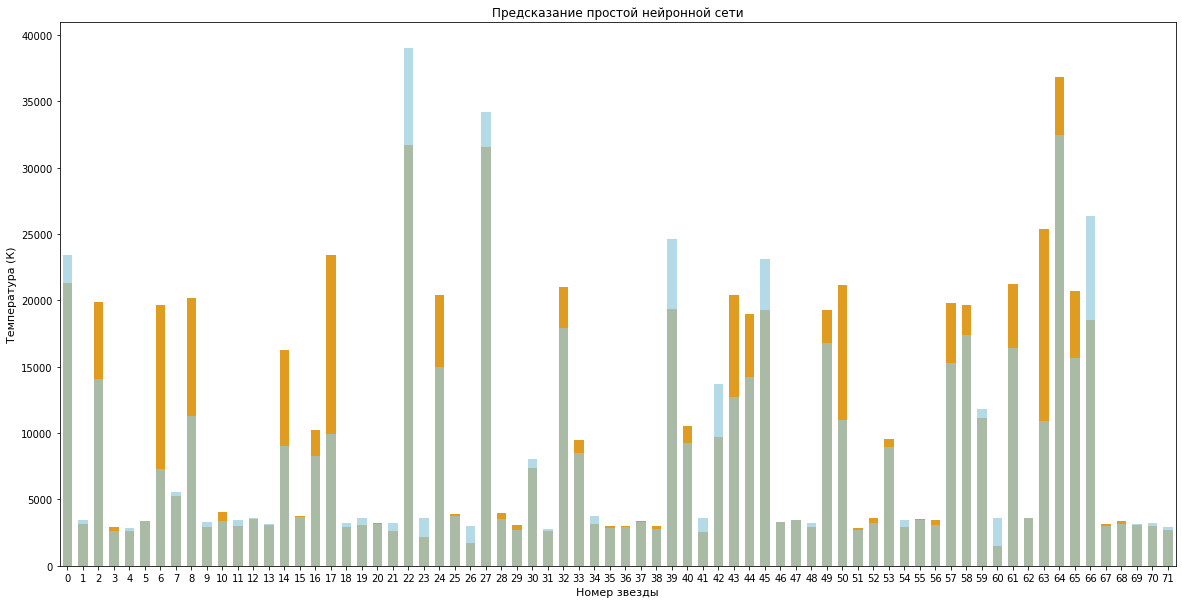

In [31]:
fig,ax = plt.subplots(figsize=(20,10))
bar_1 = sns.barplot(data=df_result,color='orange',y=df_result[0],x=df_result.index)
bar_2 = sns.barplot(data=df_target,color='skyblue',y=df_target[0],x=df_target.index,alpha=0.7)
def change_width(ax, new_value) :
    for patch in bar_1.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        patch.set_width(new_value)
        
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(bar_1, 0.6)  

ax.set_title('Предсказание простой нейронной сети')
ax.set_xlabel('Номер звезды',fontsize=11)
ax.set_ylabel('Температура (К)',fontsize=11)

plt.show()

## Улучшение нейронной сети

In [32]:
best_rmse = 99999999999999999

n_in_neurons = 19
n_hidden_neurons_1 = 10
n_hidden_neurons_2 = 4
n_out_neurons = 1

net_2 = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.Dropout(p=0.7),
    nn.LeakyReLU(),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    nn.LeakyReLU(),
    nn.Dropout(p=0.7),
    nn.Linear(n_hidden_neurons_2, n_out_neurons)
)

optimizer = torch.optim.Adam(net_2.parameters(),lr=0.03)

loss = nn.MSELoss()

batch_size = 10

num_epochs = 600

num_batches = ceil(len(train_features)/batch_size)

for epoch in range(num_epochs):
    order = np.random.permutation(len(train_features))
    for batch_idx in range(num_batches):
        start_index = batch_idx * batch_size
        
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        X_batch = train_features[batch_indexes]
        y_batch = train_target[batch_indexes]
        
        preds = net_2.forward((X_batch).float()).flatten()
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
 
    if epoch % 100 == 0 or epoch==num_epochs :
        net_2.eval()
        test_preds = net_2.forward(test_features.float())
        test_preds_2 = test_preds.detach().numpy()
        rmse = mean_squared_error(test_target,test_preds_2,squared=False)
        print(rmse)
        
        if rmse<best_rmse:
            best_preds = test_preds_2
            best_rmse=rmse

11978.449
4194.432
4501.798
4500.569
4411.0776
4388.189


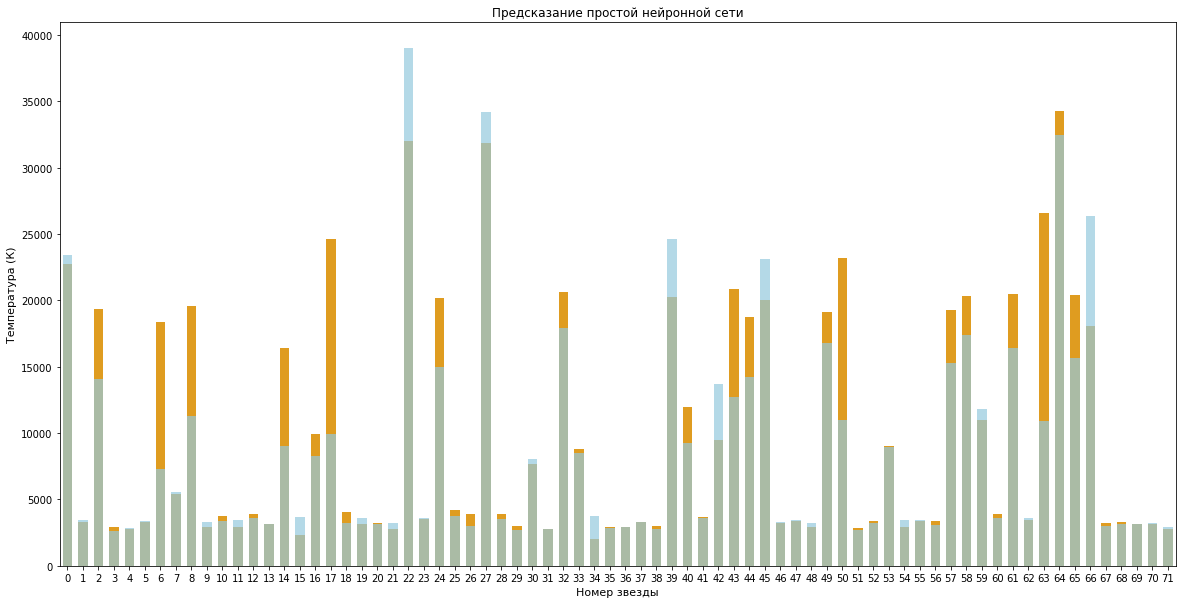

In [33]:

df_result = pd.DataFrame(best_preds)

fig,ax = plt.subplots(figsize=(20,10))
bar_1 = sns.barplot(data=df_result,color='orange',y=df_result[0],x=df_result.index)
bar_2 = sns.barplot(data=df_target,color='skyblue',y=df_target[0],x=df_target.index,alpha=0.7)
def change_width(ax, new_value) :
    for patch in bar_1.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        patch.set_width(new_value)
        
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(bar_1, 0.6)  

ax.set_title('Предсказание простой нейронной сети')
ax.set_xlabel('Номер звезды',fontsize=11)
ax.set_ylabel('Температура (К)',fontsize=11)

plt.show()

## Выводы

Исходя из графиков и результата rmse можем сделать вывод, что в данном случае техника batch size и dropout не сильно влияет на итоговый результат.